In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import plot_confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#fetching train and test data
trainimg = np.load('gdrive/MyDrive/tomatoleaf/train.npy', allow_pickle=True)
testimg = np.load('gdrive/MyDrive/tomatoleaf/test.npy', allow_pickle=True)
trainlabel = np.load('gdrive/MyDrive/tomatoleaf/trainlabel.npy', allow_pickle=True)
testlabel = np.load('gdrive/MyDrive/tomatoleaf/testlabel.npy', allow_pickle=True)

In [ ]:
#Encoding of classes
from sklearn.preprocessing import LabelEncoder
lenc2 = LabelEncoder()
x = lenc2.fit_transform(trainlabel)
lenc2.classes_
lenc = LabelEncoder()
y = lenc.fit_transform(testlabel)
print(np.unique(y))
lenc.classes_

[0 1 2 3 4 5]
[0 1 2 3 4 5]


array(['bacteria', 'fungi', 'healthy', 'mite', 'mold', 'virus'],
      dtype='<U8')

In [ ]:
#binary class matrix
trainbin = tf.keras.utils.to_categorical(x)
testbin = tf.keras.utils.to_categorical(y)
testbin.shape

(1000, 6)

In [ ]:
newModel = tf.keras.models.load_model("/content/gdrive/MyDrive/tomatoleaf/model2resnet.h5")

In [ ]:
newModel.summary()

In [ ]:
print("[INFO] Calculating model accuracy")
scores = newModel.evaluate(testimg, testbin)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
32/32 [==============================] - 36s 257ms/step - loss: 0.2798 - accuracy: 0.9460
Test Accuracy: 94.59999799728394


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
Y_pred = newModel.predict(testimg)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(y, y_pred))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[ 97   2   0   0   1   0]
 [  2 286   2   3   6   1]
 [  0   2  95   0   2   1]
 [  0   1   0  91   2   6]
 [  0  11   0   0 183   6]
 [  1   2   0   0   3 194]]


In [ ]:
print('Classification Report')
#target_names = list(class_labels.values())
print(classification_report(y, y_pred, target_names=lenc.classes_))

Classification Report
              precision    recall  f1-score   support

    bacteria       0.97      0.97      0.97       100
       fungi       0.94      0.95      0.95       300
     healthy       0.98      0.95      0.96       100
        mite       0.97      0.91      0.94       100
        mold       0.93      0.92      0.92       200
       virus       0.93      0.97      0.95       200

    accuracy                           0.95      1000
   macro avg       0.95      0.94      0.95      1000
weighted avg       0.95      0.95      0.95      1000



In [ ]:
default_image_size = tuple((256, 256))
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return image
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

Testing with images

In [ ]:
##ResNet model

healthy


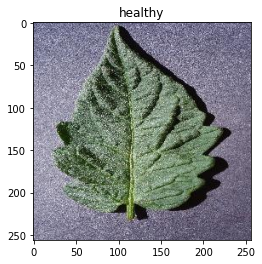

In [ ]:
img = "/content/gdrive/MyDrive/tomatoleaf/dataset/test/healthy/0a31e630-0d98-416b-b0e4-88a88aad1dc5___RS_HL 9653.JPG"
image1 = convert_image_to_array(img)
image1 = image1.reshape((1,) + image1.shape) 
#pred = newModel.predict_generator(image1)
pred = newModel.predict(image1)
pred1 = np.argmax(pred)
print(lenc.classes_[pred1])
plt.imshow(cv2.cvtColor(image1[0], cv2.COLOR_BGR2RGB))
plt.title(lenc.classes_[pred1])
plt.show()

fungi


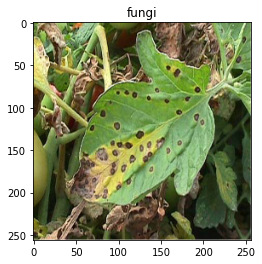

In [ ]:
img = "/content/gdrive/MyDrive/tomatoleaf/example/leaffungi.jpg"
image1 = convert_image_to_array(img)
image1 = image1.reshape((1,) + image1.shape) 
#pred = newModel.predict_generator(image1)
pred = newModel.predict(image1)
pred1 = np.argmax(pred)
print(lenc.classes_[pred1])
plt.imshow(cv2.cvtColor(image1[0], cv2.COLOR_BGR2RGB))
plt.title(lenc.classes_[pred1])
plt.show()

mold


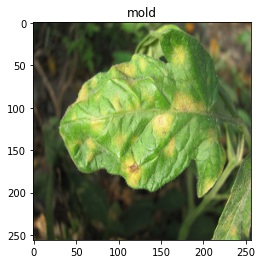

In [ ]:
img = "/content/gdrive/MyDrive/tomatoleaf/example/leafmold.jpg"
image1 = convert_image_to_array(img)
image1 = image1.reshape((1,) + image1.shape) 
#pred = newModel.predict_generator(image1)
pred = newModel.predict(image1)
pred1 = np.argmax(pred)
print(lenc.classes_[pred1])
plt.imshow(cv2.cvtColor(image1[0], cv2.COLOR_BGR2RGB))
plt.title(lenc.classes_[pred1])
plt.show()

In [ ]:
image = cv2.imread("")
print(image)

None


CNN model

In [ ]:
cnnModel = tf.keras.models.load_model("/content/gdrive/MyDrive/tomatoleaf/model.h5")

In [ ]:
print("[INFO] Calculating model accuracy")
scores = cnnModel.evaluate(testimg, testbin)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
32/32 [==============================] - 6s 104ms/step - loss: 0.4446 - accuracy: 0.9100
Test Accuracy: 91.00000262260437


In [ ]:
Y_pred = cnnModel.predict(testimg)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(y, y_pred))

Confusion Matrix
[[ 97   1   0   0   0   2]
 [  5 263   3   9  17   3]
 [  0   0  96   0   3   1]
 [  0   6   1  87   3   3]
 [  0  18   0   0 180   2]
 [  4   9   0   0   0 187]]


In [ ]:
print('Classification Report')
#target_names = list(class_labels.values())
print(classification_report(y, y_pred, target_names=lenc.classes_))

Classification Report
              precision    recall  f1-score   support

    bacteria       0.92      0.97      0.94       100
       fungi       0.89      0.88      0.88       300
     healthy       0.96      0.96      0.96       100
        mite       0.91      0.87      0.89       100
        mold       0.89      0.90      0.89       200
       virus       0.94      0.94      0.94       200

    accuracy                           0.91      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.91      0.91      0.91      1000



healthy


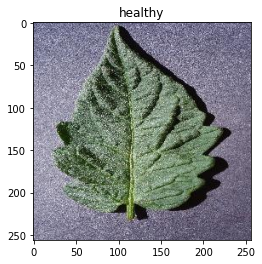

In [ ]:
img = "/content/gdrive/MyDrive/tomatoleaf/dataset/test/healthy/0a31e630-0d98-416b-b0e4-88a88aad1dc5___RS_HL 9653.JPG"
image1 = convert_image_to_array(img)
image1 = image1.reshape((1,) + image1.shape) 
pred = cnnModel.predict(image1)
pred1 = np.argmax(pred)
print(lenc.classes_[pred1])
plt.imshow(cv2.cvtColor(image1[0], cv2.COLOR_BGR2RGB))
plt.title(lenc.classes_[pred1])
plt.show()

fungi


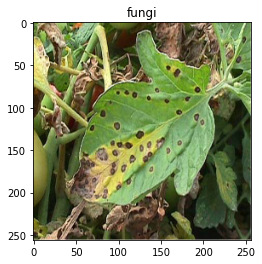

In [ ]:
img = "/content/gdrive/MyDrive/tomatoleaf/example/leaffungi.jpg"
image1 = convert_image_to_array(img)
image1 = image1.reshape((1,) + image1.shape) 
pred = cnnModel.predict(image1)
pred1 = np.argmax(pred)
print(lenc.classes_[pred1])
plt.imshow(cv2.cvtColor(image1[0], cv2.COLOR_BGR2RGB))
plt.title(lenc.classes_[pred1])
plt.show()

mold


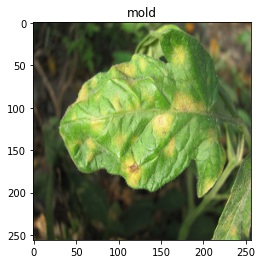

In [ ]:
img = "/content/gdrive/MyDrive/tomatoleaf/example/leafmold.jpg"
image1 = convert_image_to_array(img)
image1 = image1.reshape((1,) + image1.shape) 
pred = cnnModel.predict(image1)
pred1 = np.argmax(pred)
print(lenc.classes_[pred1])
plt.imshow(cv2.cvtColor(image1[0], cv2.COLOR_BGR2RGB))
plt.title(lenc.classes_[pred1])
plt.show()

virus


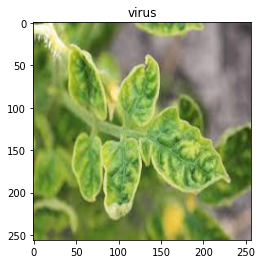

In [ ]:
img = "/content/gdrive/MyDrive/tomatoleaf/example/leafvirus.jpg"
image1 = convert_image_to_array(img)
image1 = image1.reshape((1,) + image1.shape) 
pred = cnnModel.predict(image1)
pred1 = np.argmax(pred)
print(lenc.classes_[pred1])
plt.imshow(cv2.cvtColor(image1[0], cv2.COLOR_BGR2RGB))
plt.title(lenc.classes_[pred1])
plt.show()